In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


import keras 
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.models import *
from keras.optimizers import RMSprop

In [4]:
def extract_mfcc(wav_file_name):
    # input : path_to_wav_file
    # output : mfcc_features
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 40).T, axis=0)
    
    return mfccs

In [5]:
ravedess_speech_labels = []
ravedess_speech_data = []
for dirname, _, filenames in os.walk('C:\\Users\\swami\\Desktop\\pro2\\dataset'):
    for filename in filenames:
        ravedess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname,filename)
        ravedess_speech_data.append(extract_mfcc(wav_file_name))
        
print("Finished loading the dataset")

Finished loading the dataset


In [6]:
ravedess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346550e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075010e-01, -3.2166309e+00, -3.1593943e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529737e-01, -3.0370669e+00,
         1.9554467e+00, -3.7356679e+00,  4.3770033e-01,  7.8235656e-01,
        -4.0714283e+00, -1.8607763e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476104e+00, -5.0543833e-01, -2.3373914e+00, -4.5227795e+00,
        -1.6797227e+00, -8.1932092e-01, -4.8584828e+00,  2.5533602e-01,
        -2.1487041e+00,  1.4505519e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125893e+00, -1.8361270e+00, -3.2048051e+00, -1.5453686e+00,
        -1.0909370e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658636e-01, -1.3733920e+00, -5.2931800e+00,
        -1.1623183e+01, -1.3482835e+00,  8.4371454e-01, -2.6412783e+00,
         1.0172498e+00, -3.2715344e+00, 

In [7]:
ravedess_speech_data_array = np.asarray(ravedess_speech_data)
ravedess_speech_label_array = np.array(ravedess_speech_labels)
ravedess_speech_label_array.shape

labels_categorical = to_categorical(ravedess_speech_label_array)
labels_categorical.shape


(2880, 8)

In [8]:
ravedess_speech_data_array.shape

(2880, 40)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(np.array(ravedess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [10]:
number_of_samples = ravedess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)



number_of_samples

2880

In [11]:
training_samples

2304

In [12]:
validation_samples

288

In [13]:

test_samples

288

In [14]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences = False, input_shape = (40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    
    model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [15]:
w = np.expand_dims(ravedess_speech_data_array[:training_samples], -1)

In [16]:
w.shape

(2304, 40, 1)

In [17]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravedess_speech_data_array[:training_samples], -1),labels_categorical[:training_samples], validation_data=(np.expand_dims(ravedess_speech_data_array[training_samples:training_samples+validation_samples], -1),labels_categorical[training_samples:training_samples + validation_samples]), epochs = 130, shuffle = True)

Epoch 1/130
72/72 [==============================] - 5s 31ms/step - loss: 2.0593 - accuracy: 0.1584 - val_loss: 1.9925 - val_accuracy: 0.2118
Epoch 2/130
72/72 [==============================] - 2s 22ms/step - loss: 1.9988 - accuracy: 0.1949 - val_loss: 1.9175 - val_accuracy: 0.3090
Epoch 3/130
72/72 [==============================] - 1s 20ms/step - loss: 1.9527 - accuracy: 0.2201 - val_loss: 1.8934 - val_accuracy: 0.2569
Epoch 4/130
72/72 [==============================] - 1s 20ms/step - loss: 1.9291 - accuracy: 0.2435 - val_loss: 1.8683 - val_accuracy: 0.2812
Epoch 5/130
72/72 [==============================] - 1s 19ms/step - loss: 1.8731 - accuracy: 0.2860 - val_loss: 1.8458 - val_accuracy: 0.2743
Epoch 6/130
72/72 [==============================] - 1s 19ms/step - loss: 1.8736 - accuracy: 0.2799 - val_loss: 1.8445 - val_accuracy: 0.2986
Epoch 7/130
72/72 [==============================] - 2s 21ms/step - loss: 1.8407 - accuracy: 0.2847 - val_loss: 1.7881 - val_accuracy: 0.2917
Epoch 

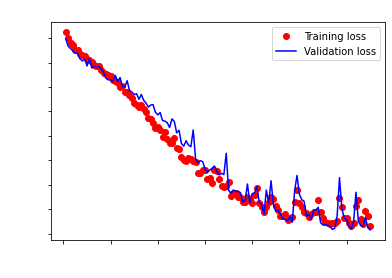

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss,'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss', color = 'white')
plt.xlabel('Epochs', color = 'white')
plt.ylabel('Loss', color = 'white')
plt.yticks(color='white')
plt.xticks(color='white')




plt.legend()

plt.show()

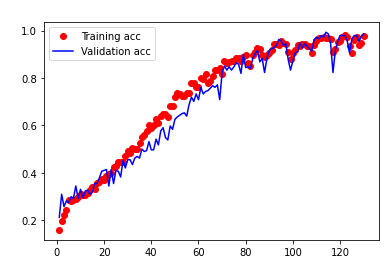

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



plt.plot(epochs, acc,'ro', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy', color = 'white')
plt.xlabel('Epochs', color = 'white')
plt.ylabel('Accuracy', color = 'white')
plt.legend()

plt.show()

In [20]:
model_A.evaluate(np.expand_dims(ravedess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9965


[0.02706294134259224, 0.9965277910232544]

In [21]:
emotions = {1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surpised'}
def predict(wav_filepath):
    test_point = extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions = model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0]) + 1])

In [22]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_02\\03-01-01-01-02-02-02.wav')

1/1 [==============================] - 0s 440ms/step
neutral


In [23]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_17\\03-01-08-01-02-01-17.wav')

1/1 [==============================] - 0s 24ms/step
surpised


In [24]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_24\\03-01-01-01-01-01-24.wav')

1/1 [==============================] - 0s 20ms/step
neutral


In [25]:
predict('C:\\Users\\swami\\Desktop\\pro2\\happy007.wav')

1/1 [==============================] - 0s 23ms/step
happy


In [28]:
predict('C:\\Users\\swami\\Desktop\\pro2\\fear130.wav')

1/1 [==============================] - 0s 41ms/step
fearful


In [26]:
predict('C:\\Users\\swami\\Desktop\\pro2\\surprise008.wav')

1/1 [==============================] - 0s 28ms/step
surpised


In [29]:
predict('C:\\Users\\swami\\Desktop\\pro2\\sample.wav')

1/1 [==============================] - 0s 40ms/step
angry


In [30]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DrS1 (1).wav')

1/1 [==============================] - 0s 49ms/step
sad


In [31]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DrS1 (2).wav')

1/1 [==============================] - 0s 49ms/step
fearful


In [32]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DrS1 (3).wav')

1/1 [==============================] - 0s 41ms/step
sad


In [33]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DS1.wav')

1/1 [==============================] - 0s 41ms/step
fearful


In [34]:
predict('C:\\Users\\swami\\Desktop\\pro2\\sample1.wav')

1/1 [==============================] - 0s 41ms/step
disgust


In [27]:
model_A.save('mymodel.h5')